in my project i will work with online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. I will try identify patterns that determine whether a game succeeds or not.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

In [1]:
import pandas as pd# Loading all the libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import seaborn as sns


In [2]:
data=pd.read_csv('/datasets/games.csv')#load the data

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14760,Mystery Trackers: The Void,PC,2011.0,Puzzle,0.00,0.02,0.00,0.00,NaN,tbd,NaN
16515,Routes PE,PS2,2007.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16235,Vanark,PS,1999.0,Shooter,0.01,0.01,0.00,0.00,NaN,NaN,NaN
6102,Street Hoops,XB,2002.0,Sports,0.21,0.06,0.00,0.01,58.0,8,T
2478,Dynasty Warriors 2,PS2,2000.0,Action,0.24,0.19,0.34,0.06,75.0,8.8,T
13064,Lagoon,SNES,1991.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
5871,Daikaijyuu Monogatari,SNES,1994.0,Role-Playing,0.00,0.00,0.30,0.00,NaN,NaN,NaN
6021,Senran Kagura Shinovi Versus: Sh?jo-tachi no S...,PSV,2013.0,Fighting,0.08,0.02,0.16,0.03,NaN,NaN,NaN
1689,The Simpsons: Road Rage,GBA,2003.0,Racing,0.86,0.32,0.00,0.02,55.0,6.8,E
9612,Doukyuusei 2,SAT,1997.0,Role-Playing,0.00,0.00,0.13,0.00,NaN,NaN,NaN


In [6]:
data.columns#let's see names of the columns. we have some capital letters. we'll change it to better look,lower

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
data.columns=data.columns.str.lower()

In [8]:
data.columns#let's check our names and see now data

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
data.info()#data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
data['user_score'].unique()#check why user_score not float

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
data[data['user_score']=='tbd']#we have 'tbd' in values, so i think we can replace it with NaN, cause we don't have 
#real fair method to replace it

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [13]:
data['user_score'].isna().sum()#now we have 6701 NaN

6701

In [14]:
data["user_score"] = data["user_score"].replace('tbd', np.nan)

In [15]:
data["user_score"].unique()# we don't have tbd more

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [16]:
data["user_score"].isna().sum()#and now everything is clear we have 9125 NaN

9125

In [17]:
data['user_score']=data['user_score'].astype(float)#now we can change type to float for our numerical work

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [19]:
data.isna().sum()#check how many missing values we have and what we can do with it

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

we have 5 columns with missing values name, year_of_release,critic_score,user_score,rating. Before we going to work with it let's check duplicate.


In [20]:
data.duplicated().sum()#we don't have duplicate

0

In [21]:
data[data['genre'].isna()]#we have only 2 NaN in genre, and all we have here it's year and platforn

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [22]:
data[data['name'].isna()]#the same with genre

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [23]:
data[(data['year_of_release']==1993.0) & (data['platform']=='GEN')]#we can check maybe we can fill genre 
#if we will see year and platform 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Ok here we see that we don't have any score or rating about this platform, so let's check maybe all GEN platform don'r have data about scores.


In [24]:
data[(data['platform']=='GEN')&data['critic_score'].notna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [25]:
data[(data['platform']=='GEN')&data['user_score'].notna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [26]:
data[(data['platform']=='GEN')&data['rating'].notna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [27]:
data[data['platform']=='GEN']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN


In [28]:
data['platform'].value_counts(ascending=True)

GG         1
PCFX       1
TG16       2
3DO        3
SCD        6
WS         6
NG        12
GEN       29
DC        52
GB        98
NES       98
2600     133
WiiU     147
SAT      173
SNES     239
XOne     247
N64      319
PS4      392
PSV      430
3DS      520
GC       556
GBA      822
XB       824
PC       974
PS      1197
PSP     1209
X360    1262
Wii     1320
PS3     1331
DS      2151
PS2     2161
Name: platform, dtype: int64

In [29]:
len(data)

16715

In [30]:
29/16715

0.001734968591085851

In [31]:
data=data.drop([659,14244 ])
data.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [32]:
data['genre'].isna().sum()

0

So it's seems like we have all 29 raws of GEN platform with error in data we don't have any score or rating about this platform. So we can't pretend any values in genre and names, we will drop them, cause they don't have avy information about scores or rating.
Let's check another missing values

In [33]:
data['year_of_release'].sort_values(ascending=True).unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [34]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [35]:
269/16715 #so our missing values in the year_of_release only 0.01% from whole data, but we will try fill some of the values

0.01609332934489979

In [36]:
data['year_of_release']=data['year_of_release'].fillna(data.groupby('name')['year_of_release'].transform('mean'))
data['year_of_release'].isna().sum()

146

In [37]:
data['year_of_release']=data['year_of_release'].fillna(0).astype(int)
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16713, dtype: int64

We filled possible missing values by names of the games and it's years_of_release, and other rows filled with 0 to change this column to int type.

In [38]:
data['critic_score'].sort_values(ascending=True).unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [39]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [40]:
data['critic_score']=data['critic_score'].fillna(data.groupby('name')['critic_score'].transform('median'))
data['critic_score'].isna().sum()

7615

In [41]:
data['user_score'].sort_values(ascending=True).unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [42]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [43]:
data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [44]:
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


In [46]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,9098.000000,7590.000000,16713.000000
mean,1988.961886,0.263302,0.145045,0.077625,0.047343,68.784843,7.125046,0.533315
std,186.812551,0.813565,0.503359,0.308871,0.186742,14.124159,1.500006,1.548282
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [47]:
data.describe(include=['object'])

,name,platform,genre,rating
count,16713,16713,16713,9949
unique,11559,31,12,8
top,Need for Speed: Most Wanted,PS2,Action,E
freq,12,2161,3369,3990


In [48]:
data.nlargest(5,['total_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [49]:
data.nsmallest(5,['total_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.0,0.0,NaN,NaN,NaN,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.0,0.0,NaN,NaN,NaN,0.00
15384,Order of War,PC,2009,Strategy,0.00,0.01,0.0,0.0,69.0,7.3,T,0.01
15486,Arslan: The Warriors of Legend,XOne,2016,Action,0.01,0.00,0.0,0.0,69.0,5.8,T,0.01
15499,Motocross Mania 3,XB,2005,Racing,0.01,0.00,0.0,0.0,38.0,3.6,T,0.01


In [50]:
data[data['name']=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,82.0,NaN,NaN,2.81
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,82.0,NaN,NaN,1.01
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,82.0,NaN,NaN,0.27
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


In [51]:
data[data['name']=='Wii Sports']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


In [52]:
data[data['name']=='Super Mario Bros.']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
201,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN,5.07


In [53]:
data['rating']=data['rating'].fillna('unknown')

In [54]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

we have no way to guess missing values with score columns or rating, it's really very individual. therefore, for the purity of the experiment, we will only change nan to unknown and leave them as it is.

Look at how many games were released in different years. Is the data for every period significant?

In [55]:
df=data[['year_of_release','name']].groupby(['year_of_release'])['name'].nunique().reset_index()
df

,year_of_release,name
0,0,133
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


In [56]:
df=df[df['year_of_release']!=0]
df#now our df without missing values

,year_of_release,name
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15
10,1989,17


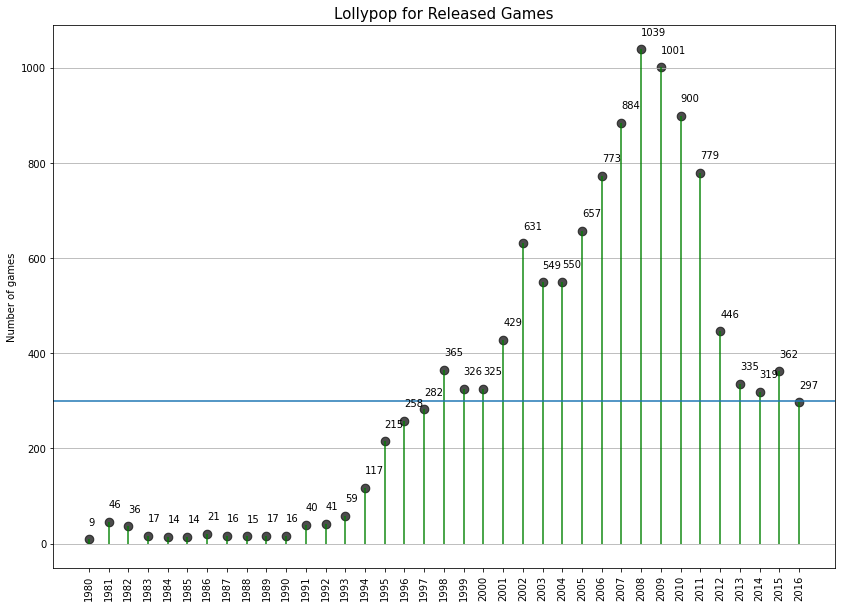

In [57]:
fig,ax=plt.subplots(figsize=(14,10))
ax.grid(axis='y')
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.name, color='green', alpha=0.7, linewidth=2)
ax.scatter(x=df.year_of_release,y=df.name, s=75, color='black',alpha=0.7)

ax.set_title("Lollypop for Released Games", fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release,rotation=90)
ax.axhline(y=300)

for row in df.itertuples():
    ax.text(row.year_of_release, row.name+30,s=row.name)
plt.show()

We see that the best selling years is 2006-2010, the increase started at 1995, but for out analyse i would take years after 2012, to see more modern picture.

Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year.

In [58]:
df=data[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
df

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [59]:
df['sales_c']=(df['total_sales']-df['total_sales'].mean())/df['total_sales'].std()
df

,platform,total_sales,sales_c
0,PCFX,0.03,-0.825614
1,GG,0.04,-0.825586
2,3DO,0.10,-0.825413
3,TG16,0.16,-0.825241
4,WS,1.42,-0.821623
5,NG,1.44,-0.821565
6,SCD,1.86,-0.820359
7,DC,15.95,-0.779896
8,GEN,28.35,-0.744287
9,SAT,33.59,-0.729239


In [60]:
df['color']=['red' if x<0 else 'blue' for x in df['sales_c']]
df

,platform,total_sales,sales_c,color
0,PCFX,0.03,-0.825614,red
1,GG,0.04,-0.825586,red
2,3DO,0.10,-0.825413,red
3,TG16,0.16,-0.825241,red
4,WS,1.42,-0.821623,red
5,NG,1.44,-0.821565,red
6,SCD,1.86,-0.820359,red
7,DC,15.95,-0.779896,red
8,GEN,28.35,-0.744287,red
9,SAT,33.59,-0.729239,red


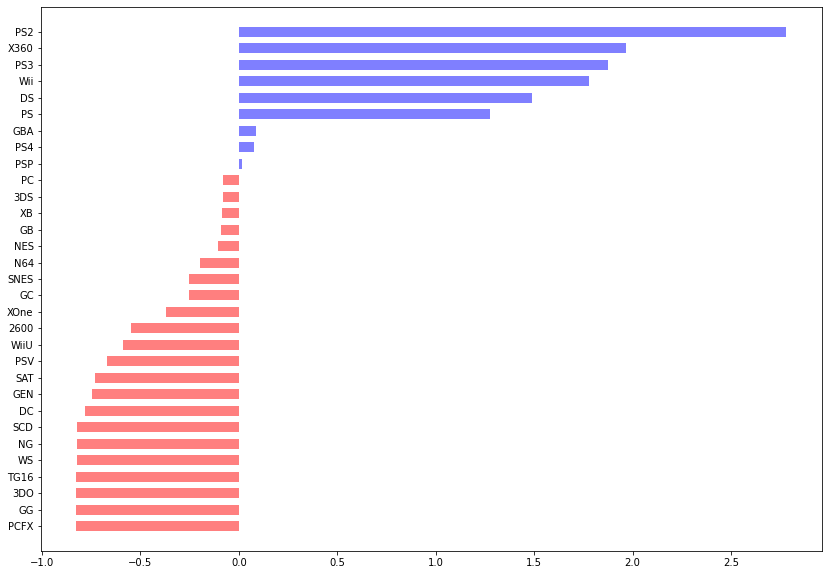

In [61]:
plt.figure(figsize=(14,10))
plt.hlines(y=df.platform,xmax=df.sales_c, xmin=0,color=df.color, alpha=0.5, linewidth=10);


So the platforms with greatest total sales is PS2, X360, PS3, Wii, DS and PS.

Now let's find platforms that used to be popular but now have zero sales. And check how long does it generally take for new platforms to appear and old ones to fade

In [62]:
df=data[data.year_of_release>=2000]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


In [63]:
df_age=df.groupby(['platform'])['year_of_release'].agg(['min','max'])
df_age['age']=df_age['max']-df_age['min']
df_age.sort_values(by='min')

,min,max,age
platform,,,
PS2,2000,2011,11
DC,2000,2008,8
WS,2000,2001,1
GB,2000,2001,1
GBA,2000,2007,7
N64,2000,2004,4
PC,2000,2016,16
PS,2000,2003,3
XB,2000,2008,8


In [64]:
df_age['age'].median()

7.5

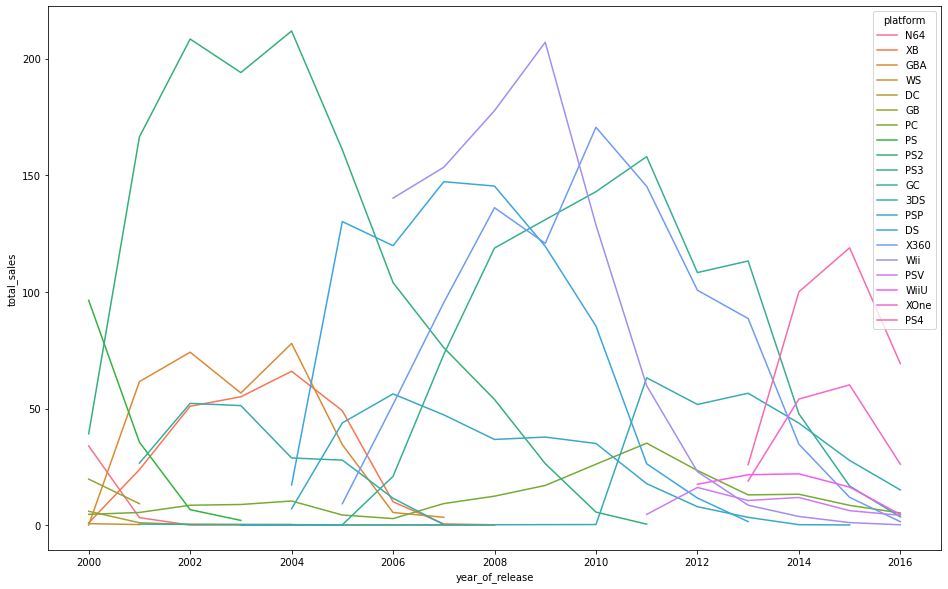

In [65]:
df=df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(16,10))
ax = sns.lineplot(data=df, x="year_of_release", y="total_sales",hue="platform")


To build analysis for 2017 i will take data after 2014, there we see the increase of new and decrease of old platforms

In [66]:
new_data=data_new=data[data.year_of_release>=2014]
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [67]:
df=pd.pivot_table(new_data,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
df#let's see all sales for each platform per each year after2012

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [68]:
df.shift(+1)#find out which ones are growing and which are shrinking

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,43.76,13.28,47.76,100.0,0.24,11.90,3.75,22.03,34.74,54.07
2016,27.78,8.52,16.82,118.9,0.12,6.25,1.14,16.35,11.96,60.14


In [69]:
potential=(df-df.shift(+1))
potential

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,-15.98,-4.76,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016,-12.64,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


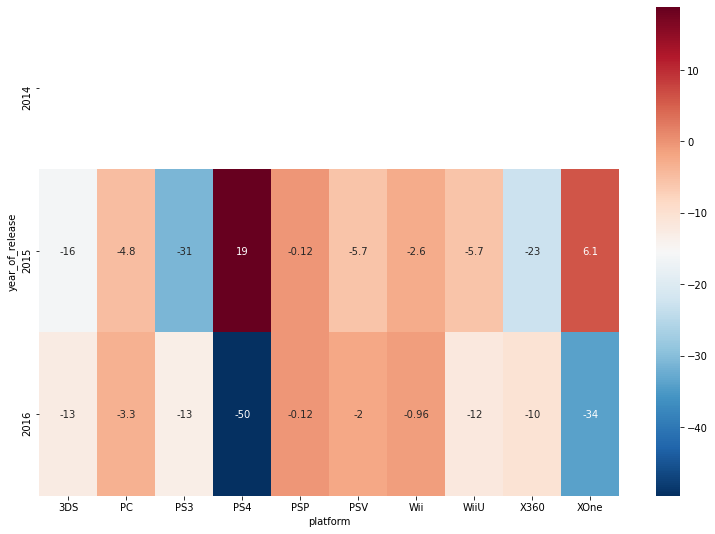

In [70]:
plt.figure(figsize=(13,9))
sns.heatmap(potential, cmap='RdBu_r', annot=True);

In [71]:
grouped_data=new_data.groupby(['platform','name'])['total_sales'].sum().reset_index()
grouped_data

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Haikyu!! Cross Team Match!,0.04
3,3DS,12-Sai. Honto no Kimochi,0.07
4,3DS,12-Sai. Koisuru Diary,0.05
...,...,...,...
1684,XOne,Wolfenstein: The Old Blood,0.15
1685,XOne,Worms: WMD,0.01
1686,XOne,XCOM 2,0.04
1687,XOne,ZombiU,0.01


In [72]:
order=grouped_data.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')['platform']
order

4     PSP
6     Wii
5     PSV
1      PC
7    WiiU
8    X360
2     PS3
0     3DS
9    XOne
3     PS4
Name: platform, dtype: object

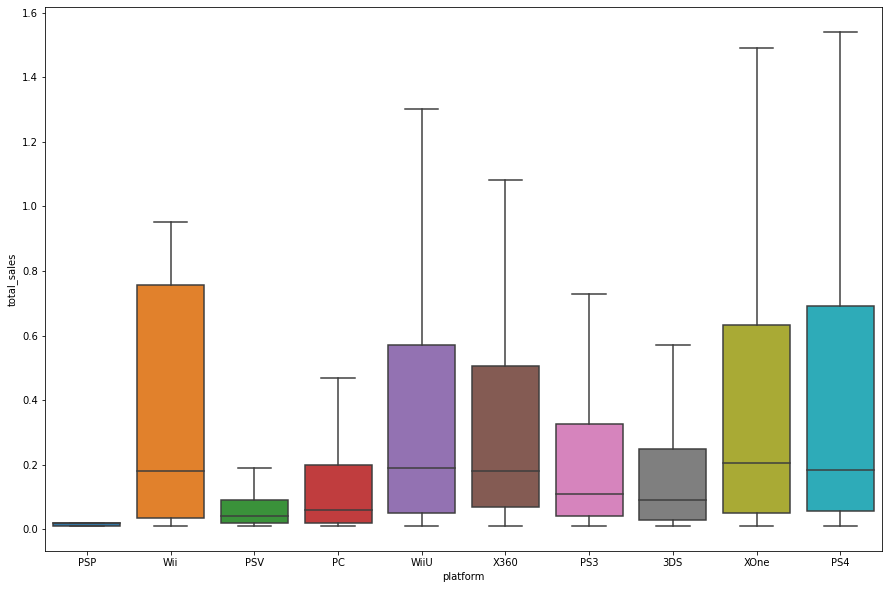

In [73]:
plt.figure(figsize=(15,10))
sns.boxplot(x='platform',y='total_sales',data=grouped_data,order=order,showfliers = False);

We will take PS4, XOne and WiiU for our leaders in sales and it's platforms who is growing.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
You are right</div>

Take a look at how user and professional reviews affect sales for a particular popular platform. Build a scatter plot and calculate the correlation between reviews and sales. 

In [74]:
def score_effect(platform,score_type): 
    filter_data=new_data[(new_data.platform==platform)&(new_data[score_type].notna())][['total_sales',score_type]]
    corr=filter_data[score_type].corr(filter_data['total_sales'])
    if corr>0.5 :
        result='positive correlation between this score and sales'
    if -0.5<corr<0.5:
        result='no correlation between this score and sales'
    else:
        result='negative correlation between this score and sales'
    print(result)
    print(sns.scatterplot(data=filter_data, x='total_sales', y=score_type))
    plt.show()


In [75]:
plat=['XOne','PS4','WiiU']
col=['critic_score','user_score']

XOne critic_score
no correlation between this score and sales
AxesSubplot(0.125,0.125;0.775x0.755)


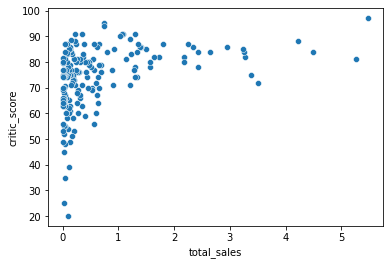

XOne user_score
no correlation between this score and sales
AxesSubplot(0.125,0.125;0.775x0.755)


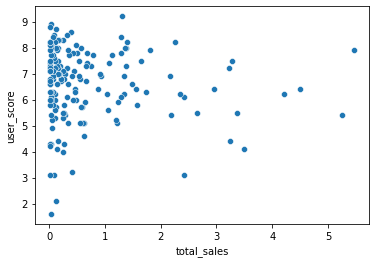

PS4 critic_score
no correlation between this score and sales
AxesSubplot(0.125,0.125;0.775x0.755)


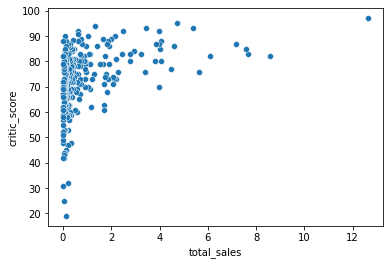

PS4 user_score
no correlation between this score and sales
AxesSubplot(0.125,0.125;0.775x0.755)


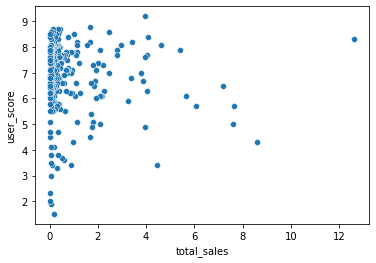

WiiU critic_score
no correlation between this score and sales
AxesSubplot(0.125,0.125;0.775x0.755)


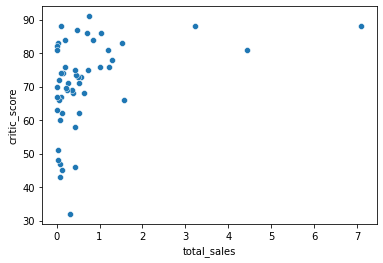

WiiU user_score
no correlation between this score and sales
AxesSubplot(0.125,0.125;0.775x0.755)


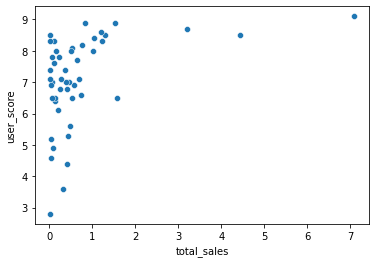

In [76]:
future_df=[]
for i in plat:
    for x in col:
        print(i,x)
        future_df.append([i,x,score_effect(i,x)])


So we see that we don't have real correlation between sales and rcitic or user score.

let's create a user profile for each region(NA, EU, JP)
And determine:
The top five platforms. Describe variations in their market shares from region to region.

In [77]:
data_na=new_data.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
data_na

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


In [78]:
data_na.value_counts()

platform  na_sales
3DS       22.64       1
PS3       22.05       1
PS4       98.61       1
X360      28.30       1
XOne      81.27       1
dtype: int64

In [79]:
data_jp=new_data.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
data_jp

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


In [80]:
data_jp.value_counts()

platform  jp_sales
3DS       44.24       1
PS3       11.22       1
PS4       15.02       1
PSV       14.54       1
WiiU      7.31        1
dtype: int64

In [81]:
data_eu=new_data.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
data_eu

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


In [82]:
data_eu.value_counts()

platform  eu_sales
3DS       16.12       1
PC        17.97       1
PS3       25.54       1
PS4       130.04      1
XOne      46.25       1
dtype: int64

In [83]:
all_rev=new_data.groupby(['platform'])['na_sales','jp_sales','eu_sales'].sum().reset_index()
all_rev

/tmp/ipykernel_142/3981395173.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_rev=new_data.groupby(['platform'])['na_sales','jp_sales','eu_sales'].sum().reset_index()


,platform,na_sales,jp_sales,eu_sales
0,3DS,22.64,44.24,16.12
1,PC,7.23,0.00,17.97
2,PS3,22.05,11.22,25.54
3,PS4,98.61,15.02,130.04
4,PSP,0.00,0.36,0.00
5,PSV,2.52,14.54,3.53
6,Wii,2.08,0.00,2.59
7,WiiU,19.36,7.31,13.15
8,X360,28.30,0.08,15.49
9,XOne,81.27,0.32,46.25


In [84]:
all_rev['na_sales%']=all_rev['na_sales']/all_rev['na_sales'].sum()
all_rev['jp_sales%']=all_rev['jp_sales']/all_rev['jp_sales'].sum()
all_rev['eu_sales%']=all_rev['eu_sales']/all_rev['eu_sales'].sum()
all_rev.sort_values(by='na_sales',ascending=False)

,platform,na_sales,jp_sales,eu_sales,na_sales%,jp_sales%,eu_sales%
3,PS4,98.61,15.02,130.04,0.347145,0.161349,0.480420
9,XOne,81.27,0.32,46.25,0.286102,0.003438,0.170866
8,X360,28.30,0.08,15.49,0.099627,0.000859,0.057226
0,3DS,22.64,44.24,16.12,0.079701,0.475239,0.059554
2,PS3,22.05,11.22,25.54,0.077624,0.120529,0.094355
7,WiiU,19.36,7.31,13.15,0.068155,0.078526,0.048581
1,PC,7.23,0.00,17.97,0.025452,0.000000,0.066388
5,PSV,2.52,14.54,3.53,0.008871,0.156193,0.013041
6,Wii,2.08,0.00,2.59,0.007322,0.000000,0.009568
4,PSP,0.00,0.36,0.00,0.000000,0.003867,0.000000


In [85]:
comb=data_na.merge(data_jp,how='outer',on=['platform'])
comb

,platform,na_sales,jp_sales
0,PS4,98.61,15.02
1,XOne,81.27,NaN
2,X360,28.30,NaN
3,3DS,22.64,44.24
4,PS3,22.05,11.22
5,PSV,NaN,14.54
6,WiiU,NaN,7.31


In [86]:
comb=comb.merge(data_eu,how='outer',on=['platform'])
comb

,platform,na_sales,jp_sales,eu_sales
0,PS4,98.61,15.02,130.04
1,XOne,81.27,NaN,46.25
2,X360,28.30,NaN,NaN
3,3DS,22.64,44.24,16.12
4,PS3,22.05,11.22,25.54
5,PSV,NaN,14.54,NaN
6,WiiU,NaN,7.31,NaN
7,PC,NaN,NaN,17.97


In [87]:
list_na=comb['na_sales'].tolist()
list_eu=comb['eu_sales'].tolist()
list_jp=comb['jp_sales'].tolist()
list_platform=comb['platform'].tolist()

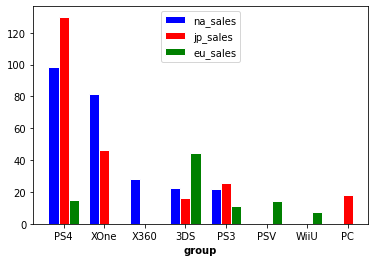

In [88]:
barWidth = 0.25
 
bars1 = list_na
bars2 = list_eu
bars3 = list_jp

 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='na_sales')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='jp_sales')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='eu_sales')
 
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], list_platform)
 
plt.legend()
plt.show()

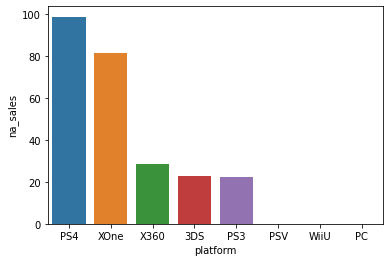

In [89]:
sns.barplot(x="platform", y="na_sales", data=comb);

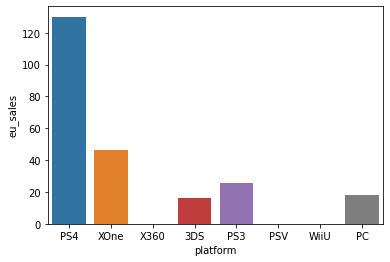

In [90]:
sns.barplot(x="platform", y="eu_sales", data=comb);

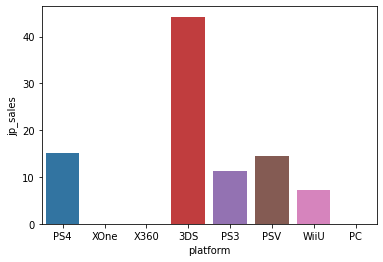

In [91]:
sns.barplot(x="platform", y="jp_sales", data=comb);

We see that we have PS4 leaders in na and eu_sales, in jp_sales 3DS is leader, also we see some platforms are in top in some region not in top of other, like X360 is one of the popular in na,but not in jp and eu.

In [92]:
genre_na=new_data.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
genre_na

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


In [93]:
genre_na.value_counts()

genre         na_sales
Action        72.53       1
Misc          15.05       1
Role-Playing  33.47       1
Shooter       79.02       1
Sports        46.13       1
dtype: int64

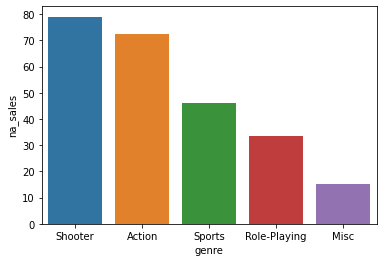

In [94]:
sns.barplot(x="genre", y="na_sales", data=genre_na);

In [95]:
genre_eu=new_data.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
genre_eu

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


In [96]:
genre_eu.value_counts()

genre         eu_sales
Action        74.68       1
Racing        14.13       1
Role-Playing  28.17       1
Shooter       65.52       1
Sports        45.73       1
dtype: int64

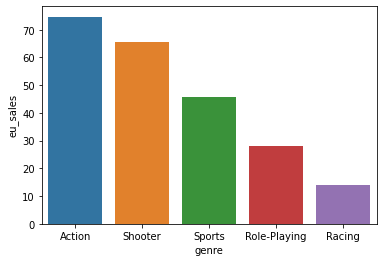

In [97]:
sns.barplot(x="genre", y="eu_sales", data=genre_eu);

In [98]:
genre_jp=new_data.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
genre_jp

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


In [99]:
genre_jp.value_counts()

genre         jp_sales
Action        29.58       1
Fighting      6.37        1
Misc          5.61        1
Role-Playing  31.16       1
Shooter       4.87        1
dtype: int64

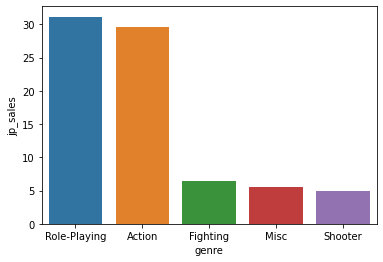

In [100]:
sns.barplot(x="genre", y="jp_sales", data=genre_jp);

In [101]:
merge_genre=genre_na.merge(genre_eu,how='outer',on=['genre'])
merge_genre

,genre,na_sales,eu_sales
0,Shooter,79.02,65.52
1,Action,72.53,74.68
2,Sports,46.13,45.73
3,Role-Playing,33.47,28.17
4,Misc,15.05,NaN
5,Racing,NaN,14.13


In [102]:
merge_genre=merge_genre.merge(genre_jp,how='outer',on=['genre'])
merge_genre

,genre,na_sales,eu_sales,jp_sales
0,Shooter,79.02,65.52,4.87
1,Action,72.53,74.68,29.58
2,Sports,46.13,45.73,NaN
3,Role-Playing,33.47,28.17,31.16
4,Misc,15.05,NaN,5.61
5,Racing,NaN,14.13,NaN
6,Fighting,NaN,NaN,6.37


The most popular genre in jp is Role-Playing and Shooter is most unpopular. In na Shooter is unlike jp is the most popular genre, and in eu the Action genre is the most poplular.we see that the preferences of these regions are completely different, as there are genres that are not even included in the top five others

Do ESRB ratings affect sales in individual regions?

In [103]:
na=new_data.groupby(['rating'])['na_sales'].mean().reset_index().sort_values(by='na_sales',ascending=False).head()
na

,rating,na_sales
2,M,0.363849
0,E,0.231689
1,E10+,0.179622
3,T,0.143727
4,unknown,0.086409


In [104]:
eu=new_data.groupby(['rating'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu

,rating,eu_sales
2,M,0.352604
0,E,0.265114
1,E10+,0.141405
3,T,0.125720
4,unknown,0.078705


In [105]:
jp=new_data.groupby(['rating'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp

,rating,jp_sales
4,unknown,0.075968
3,T,0.054539
0,E,0.040822
2,M,0.030226
1,E10+,0.024108


In [106]:
rating=new_data.groupby(['rating'])['na_sales','jp_sales','eu_sales'].sum().reset_index()
rating

/tmp/ipykernel_142/3145839794.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rating=new_data.groupby(['rating'])['na_sales','jp_sales','eu_sales'].sum().reset_index()


,rating,na_sales,jp_sales,eu_sales
0,E,50.74,8.94,58.06
1,E10+,33.23,4.46,26.16
2,M,96.42,8.01,93.44
3,T,38.95,14.78,34.07
4,unknown,64.72,56.90,58.95


In [107]:
rating['na_sales%']=rating['na_sales']/rating['na_sales'].sum()
rating['jp_sales%']=rating['jp_sales']/rating['jp_sales'].sum()
rating['eu_sales%']=rating['eu_sales']/rating['eu_sales'].sum()
rating.sort_values(by='na_sales',ascending=False)

,rating,na_sales,jp_sales,eu_sales,na_sales%,jp_sales%,eu_sales%
2,M,96.42,8.01,93.44,0.339435,0.086046,0.345205
4,unknown,64.72,56.90,58.95,0.227839,0.611236,0.217785
0,E,50.74,8.94,58.06,0.178624,0.096036,0.214497
3,T,38.95,14.78,34.07,0.137119,0.158771,0.125868
1,E10+,33.23,4.46,26.16,0.116982,0.047911,0.096645



In na region the most popular games with rating M(17+), so it's game for adults, and we have a lot of sales with rating E(everyone), less games with rating T and E10+ (that means games only for children have less sales)
In eu region we have the similar picture to na.
And in jp region we see something strange because rating T(teenagers 13+) more sales then rating E and M, but also we have the most sales in unknown category, and this category has also big values in other region, which means that we have a lot of missing data.

 Test the following hypotheses:
first HO: Average user ratings of the Xbox One and PC platforms are the same.

In [108]:
new_data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [109]:
xone=new_data[(new_data.platform=='XOne')&(new_data.user_score.notna())]['user_score'].astype(float)
xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 165, dtype: float64

In [110]:
xone.unique()

array([7.9, 5.4, 6.4, 6.2, 4.1, 5.5, 7.5, 4.4, 7.2, 3.1, 6.1, 8.2, 6.9,
       6.3, 5.8, 6.6, 7.3, 8. , 9.2, 7.8, 8.4, 5.9, 5.1, 5.2, 7.7, 7.4,
       5.6, 7. , 6.7, 4.6, 5.7, 6.8, 8.1, 6. , 7.1, 3.2, 8.6, 8.5, 4.3,
       5.3, 4. , 8.3, 8.7, 2.1, 7.6, 4.9, 8.9, 1.6, 4.2, 8.8])

In [111]:
pc=new_data[(new_data.platform=='PC')&(new_data.user_score.notna())]['user_score'].astype(float)
pc

458      3.9
1530     5.4
1730     7.9
2303     5.7
2784     5.9
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 122, dtype: float64

In [112]:
pc.unique()

array([3.9, 5.4, 7.9, 5.7, 5.9, 9.3, 8. , 6.7, 6.2, 3. , 6.8, 8.3, 6. ,
       8.2, 4.7, 5.8, 4.5, 7.6, 5.5, 6.9, 7.5, 4.2, 7.3, 7.1, 4.4, 3.2,
       8.6, 4.3, 4.8, 6.4, 7.4, 8.4, 5.3, 8.9, 3.8, 2.5, 7. , 7.7, 2.9,
       3.6, 5.1, 4. , 3.5, 6.1, 6.3, 8.7, 7.8, 1.4, 3.7, 2.4, 8.5])

In [113]:
from scipy.stats import levene
stat, p = levene(xone, pc)
p<0.05

True

In [114]:
from scipy import stats
stats.ttest_ind(xone, pc)

Ttest_indResult(statistic=1.6285882029651313, pvalue=0.10450507919348415)

In [115]:
p_value=stats.ttest_ind(xone, pc,equal_var=False).pvalue
p_value

0.11601398086668827

In [116]:
p_value=p_value
alpha=0.05
if p_value<alpha:
    print('Reject H0: Average user ratings of the  XOne and PC platforms are not the same.')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that averages user ratings of the XOne and PC platforms are not the same.")

Fail to Reject H0: We don't have enough evidence to say that averages user ratings of the XOne and PC platforms are not the same.


So according to our testing we can not reject our HO.

 Test the following hypotheses:
second HO: Average user ratings for the Action and Sports genres are the same.

In [117]:
new_data['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [118]:
action=new_data[(new_data.genre=='Action')&(new_data.user_score.notna())]['user_score'].astype(float)
action

42       8.3
165      7.9
231      8.1
295      6.3
304      4.9
        ... 
16544    6.8
16597    6.0
16652    8.5
16660    6.7
16692    7.6
Name: user_score, Length: 297, dtype: float64

In [119]:
sports=new_data[(new_data.genre=='Sports')&(new_data.user_score.notna())]['user_score'].astype(float)
sports

77       4.3
94       5.0
143      5.7
264      4.5
314      6.7
        ... 
16120    6.3
16142    8.8
16146    6.9
16518    1.4
16643    6.6
Name: user_score, Length: 127, dtype: float64

In [120]:
from scipy.stats import levene
stat, p = levene(action, sports)
p<0.05

True

In [121]:
p_value=stats.ttest_ind(action, sports,equal_var=True).pvalue
p_value

2.8711147985105864e-19

In [122]:
stats.ttest_ind(action, sports).pvalue<0.05

True

In [123]:
p_value=p_value
alpha=0.05
if p_value<alpha:
    print('Reject H0: Average user ratings for the action and sports genres are not the same.')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that average user ratings for the action and sports genres are not the same.")

Reject H0: Average user ratings for the action and sports genres are not the same.


So yes the second  following hypotheses is true. 
—Average user ratings for the Action and Sports genres are different.
Cause we got reject of out HO which was 'Average user ratings for the action and sports genres are the same.'

## Conclusion
#### PTD in the process of our analysis, we cleaned  the data, filled in the missing values with those parameters that could give us the most accurate picture, the rest was left or not taken into account in the analysis, we also changed the types of several columns.
#### EDA we found that the largest number of games were released ibetween 2008 and 2012 years, for our work, we took a period of time starting from 2014, cause we need to understand the specifics of 2015-2016 in order to make a forecast for 2017. The sales leaders platform are 'XOne','PS4','WiiU' but if we will take a look for every region it will be different numbers, so i reccomend focus on each region on its preference . We saw that the most popular genres in regions also different for na- , for jp- and for eu- . We have a lot of missing data in raiting, but we can say that in eu and na regions we have the most popular rating E and M universal and common games, but in jp region we have ,most sales with teenagers games.
#### About our  following hypotheses . We don't have enough evidence to say that averages user ratings of the XOne and PC platforms are not the same.
#### And after testing the second following hypotheses. Average user ratings for the Action and Sports genres are different. 